# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Abigail Metanoia Melody
- **Email:** abigailmetanoia17@gmail.com
- **ID Dicoding:** m200d4kx3142


## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling diminati oleh konsumen?
- Apakah kategori produk yang sering diminati konsumen memiliki review yang baik?

## Import Semua Packages/Library yang Digunakan
Library digunakan untuk membantu dalam proses pengolahan data. Jadi kita tidak perlu repot-repot membuat fungsi yang berguna dalam proses analisis data.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling
Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data.

### Gathering Data
Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

In [12]:
# Baca data dari file CSV
product_df = pd.read_csv("data/products_dataset.csv")
category_translation_df = pd.read_csv("data/product_category_name_translation.csv")
orders_df = pd.read_csv("data/order_items_dataset.csv")
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")

# Gabungkan product_df dengan category_translation_df agar mengetahui nama masing-masing product
merged_product_df = pd.merge(left=product_df,
                            right=category_translation_df,
                            how="inner",
                            left_on="product_category_name",
                            right_on="product_category_name")

# Gabungkan dengan tabel produk dengan order agar mengatuhi produk mana yang di order konsumen
final_df = pd.merge(left=merged_product_df,
                    right=orders_df,
                    how="inner",
                    left_on="product_id",
                    right_on="product_id")

# Gabungkan kembali tabel dengan order review, agar mengetahui review masing-masing produk yang dipesan
df = pd.merge(left=final_df,
                    right=order_reviews_df,
                    how="inner",
                    left_on="order_id",
                    right_on="order_id")

df.shape

(110750, 22)

### Assessing Data
Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

In [13]:
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,...,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,...,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,0d953190c8ed55747f7b7ad3af2885e3,5,NaN,O produto que chegou é mais bonito do que eu e...,2017-11-24 00:00:00,2017-11-24 18:34:45
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,...,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,8e762254a11ad4292ec8fb6586c681cf,2,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05
3,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,...,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,de311dfd0cf46c629921db407a7d87e9,5,NaN,ótimo produto e ótima loja para comprar pelo s...,2017-08-09 00:00:00,2017-08-09 19:30:09
4,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,...,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48,097582b6b0630f5cb1a409c223c406dc,3,Não passou confiança,"O fornecedor e a nf é de São Paulo, o produto ...",2018-06-07 00:00:00,2018-06-12 13:44:18


In [14]:
df_null = df.isnull().sum().reset_index()
df_null.columns = ["features", "missing_value"]
df_null['Percentage'] = (df_null["missing_value"]/df.shape[0])*100
df_null.sort_values(by=['Percentage'], ascending = False).reset_index()

,index,features,missing_value,Percentage
0,18,review_comment_title,97403,87.948533
1,19,review_comment_message,63827,57.631603
2,5,product_weight_g,1,0.000903
3,6,product_length_cm,1,0.000903
4,7,product_height_cm,1,0.000903
5,8,product_width_cm,1,0.000903
6,0,product_id,0,0.000000
7,13,shipping_limit_date,0,0.000000
8,20,review_creation_date,0,0.000000
9,17,review_score,0,0.000000


In [15]:
df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value,review_score
count,110750.000000,110750.000000,110750.000000,110749.000000,110749.000000,110749.000000,110749.000000,110750.000000,110750.000000,110750.000000,110750.000000
mean,48.776135,786.798230,2.206980,2096.696097,30.210377,16.607744,23.046709,1.196397,120.475691,20.012513,4.035395
std,10.025553,651.643826,1.719776,3751.652718,16.175517,13.462204,11.717480,0.692883,181.861574,15.815047,1.385325
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.850000,0.000000,1.000000
25%,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,39.900000,13.080000,4.000000
50%,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,74.900000,16.290000,5.000000
75%,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,134.900000,21.170000,5.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,21.000000,6735.000000,409.680000,5.000000


In [16]:
duplikat = df.duplicated()
jumlah_duplikat = duplikat.sum()
print("Jumlah baris duplikat:", jumlah_duplikat)

Jumlah baris duplikat: 0


### Cleaning Data
Proses ini dilakukan untuk mengatasi permasalahan yang ditemukan pada assessing data, seperti mengatasi missing value, outlier, dan lain-lain.

In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(0, inplace=True)  # Mengisi dengan 0 untuk kolom non-numerik
    else:
        df[column].fillna(df[column].mean(), inplace=True)
        
print(df)

                              product_id product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
2       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
3       0d009643171aee696f4733340bc2fdd0            perfumaria   
4       0d009643171aee696f4733340bc2fdd0            perfumaria   
...                                  ...                   ...   
110745  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
110746  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
110747  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
110748  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
110749  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      40.0                       287.0                 1.0   
1                      39.0                      

## Exploratory Data Analysis (EDA)
EDA merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis.

### Explore Parameter Statistik
Method pertama yang akan kita bahas ialah method describe(). Method ini memungkinkan kita untuk melihat rangkuman parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame.

In [18]:
df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,110750,110750,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110750,...,110750,110750,110750.000000,110750.000000,110750,110750.000000,110750.0,110750.0,110750,110750
unique,32171,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,...,3028,91387,NaN,NaN,96320,NaN,4478.0,35178.0,633,96164
top,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table,...,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,NaN,NaN,e8236fe7b6e1bdd513a500de361e2b87,NaN,0.0,0.0,2018-05-15 00:00:00,2017-07-30 14:19:07
freq,524,11137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11137,...,2020,22,NaN,NaN,21,NaN,97403.0,63827.0,506,21
mean,NaN,NaN,48.776135,786.798230,2.206980,2096.696097,30.210377,16.607744,23.046709,NaN,...,NaN,NaN,120.475691,20.012513,NaN,4.035395,NaN,NaN,NaN,NaN
std,NaN,NaN,10.025553,651.643826,1.719776,3751.635780,16.175444,13.462143,11.717427,NaN,...,NaN,NaN,181.861574,15.815047,NaN,1.385325,NaN,NaN,NaN,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,...,NaN,NaN,0.850000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,...,NaN,NaN,39.900000,13.080000,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,...,NaN,NaN,74.900000,16.290000,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,...,NaN,NaN,134.900000,21.170000,NaN,5.000000,NaN,NaN,NaN,NaN


## Visualization & Explanatory Analysis
Visualisasi Data adalah bagaiamana cara kita untuk memvisualisasikan data untuk memudahkan kita dalam memahami data serta beguna dalam menjawab pertanyaan-pertanyaan atau permasalahan yang ingin kita pecahkan.

### Pertanyaan 1: - Kategori produk apa yang paling diminati oleh konsumen?

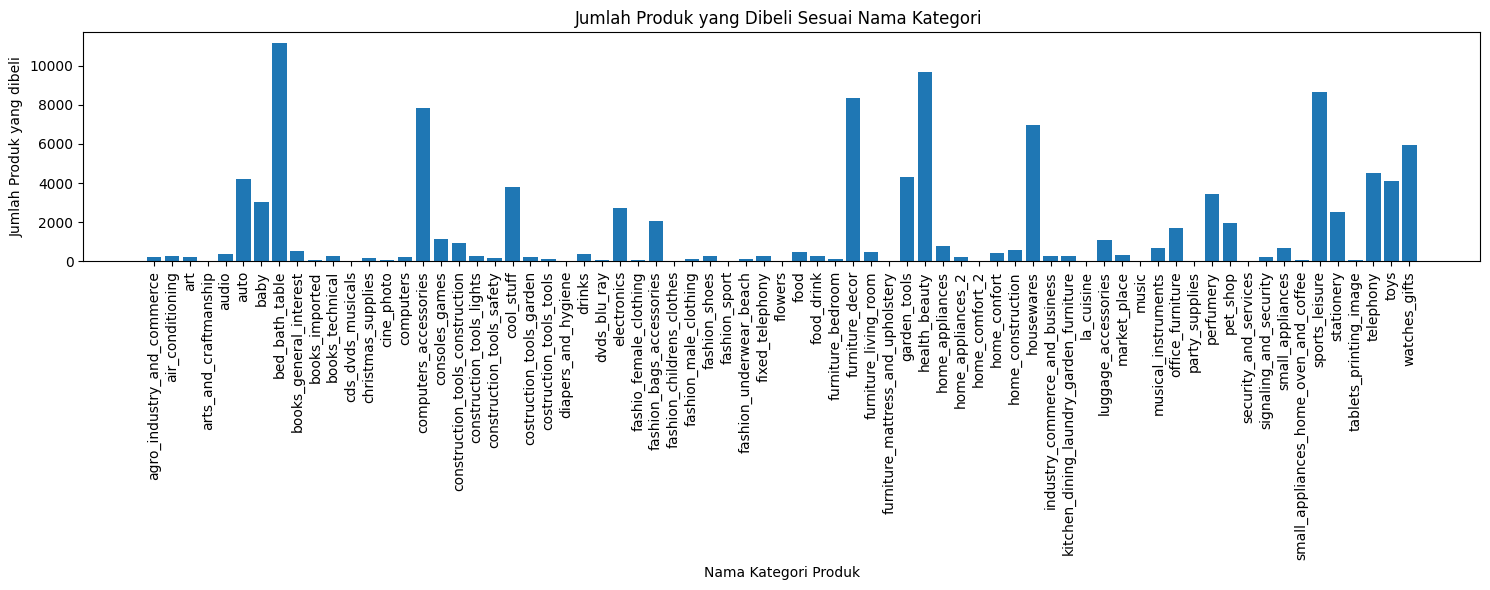

In [19]:
# Kelompokkan data berdasarkan kategori produk dan hitung jumlah produk yang dipesan
product_counts = df.groupby('product_category_name_english').size().reset_index(name='product_count')

# Gambarkan bar plot
plt.figure(figsize=(15, 6))
plt.bar(x=product_counts['product_category_name_english'], height=product_counts['product_count'])
plt.xticks(rotation=90)
plt.xlabel('Nama Kategori Produk')
plt.ylabel('Jumlah Produk yang dibeli')
plt.title('Jumlah Produk yang Dibeli Sesuai Nama Kategori ')
plt.tight_layout()
plt.show()


### Pertanyaan 2: Apakah kategori produk yang sering diminati konsumen memiliki review yang baik?

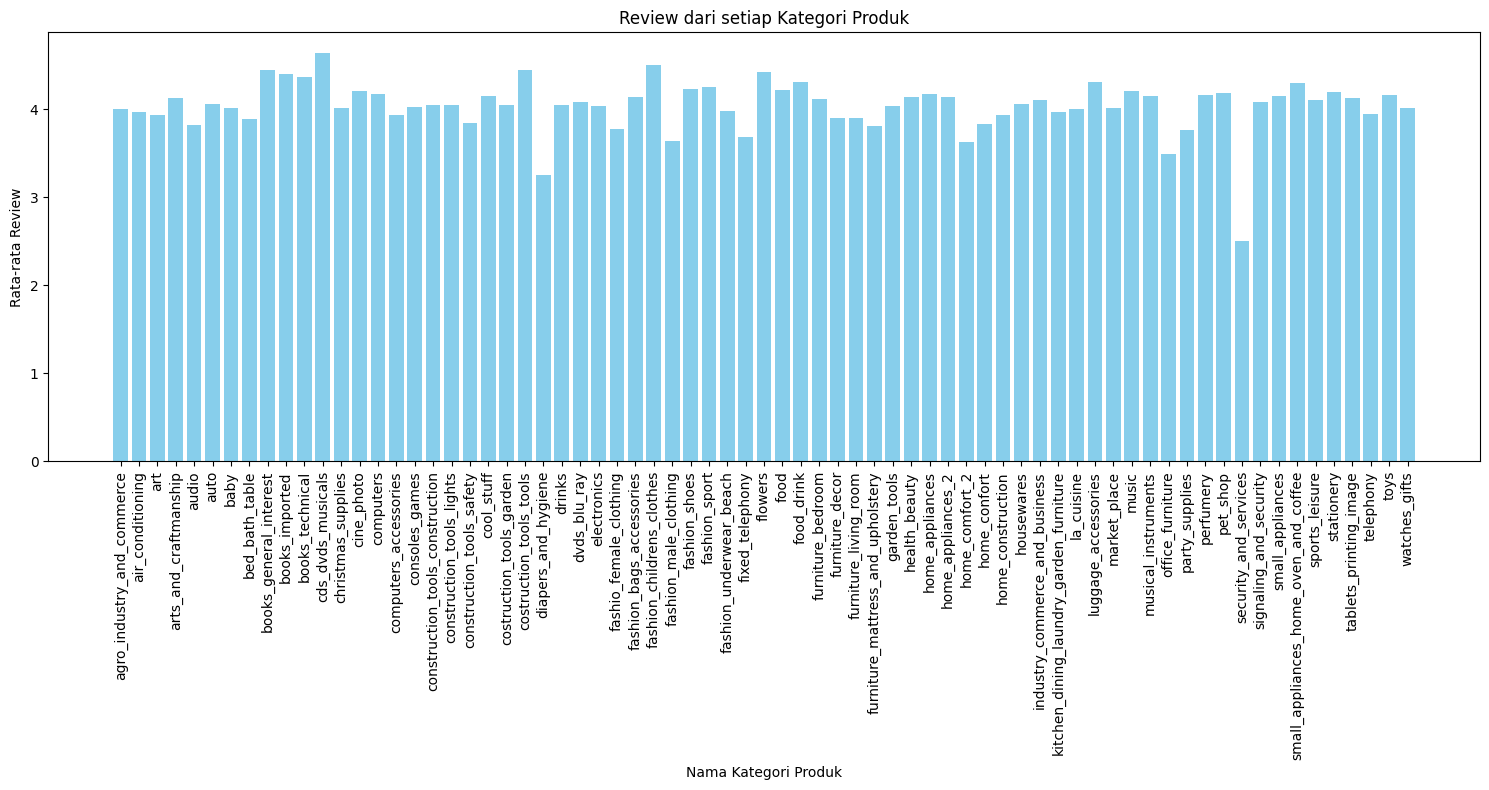

In [20]:
# Hitung rata-rata nilai review untuk setiap produk
avg_review = df.groupby('product_category_name_english')['review_score'].mean().reset_index()

# Visualisasikan data
plt.figure(figsize=(15, 8))
plt.bar(x=avg_review['product_category_name_english'], height=avg_review['review_score'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Nama Kategori Produk')
plt.ylabel('Rata-rata Review')
plt.title('Review dari setiap Kategori Produk')
plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1

Sesuai dengan analisis data yang dihasilkan, kategori prouduk yang sering diminati oleh konsumen adalah "bed_bath_table" atau mungkin dalam bahasa inggrisnya adalah "meja kamar mandi tempat tidur".

- Conclution pertanyaan 2

Sesuai dengan analisis data yang dilakukan, kategori produk yang sering diminati oleh konsumen yakni bed_bath_table"  termasuk memiliki review yang baik, walaupun bukan yang terbaik dari seluruh kategori produk.

